In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [3]:
df = pd.read_csv('segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.drop('ID', axis=1, inplace=True)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [11]:
X = df[['Age', 'Income']]

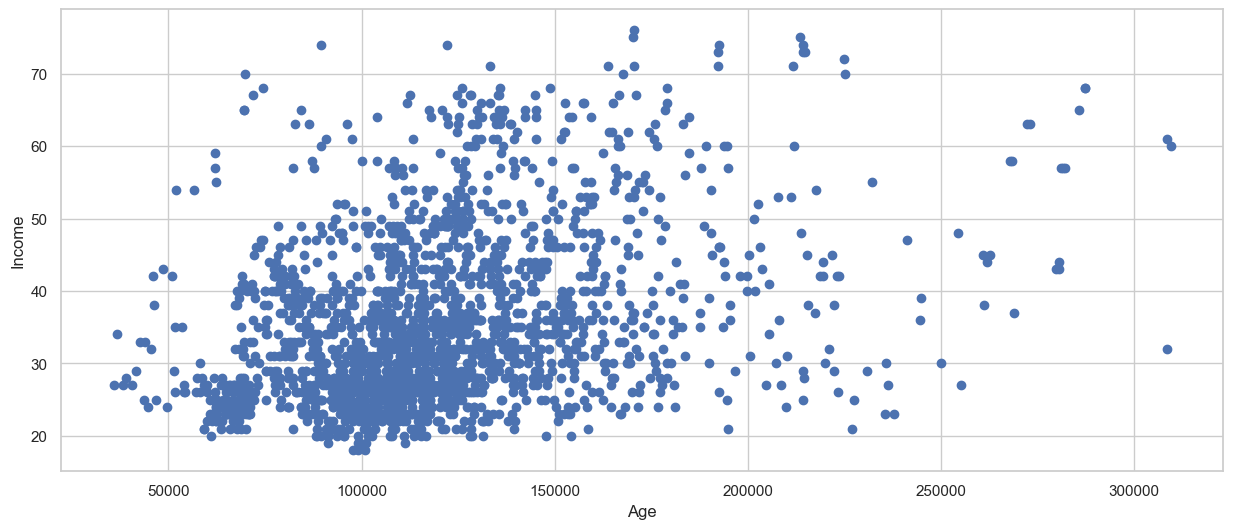

In [15]:
plt.figure(figsize=(15,6))
plt.scatter(df["Income"],df["Age"])

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [29]:
min_samples = 4

# Finding the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = nearest_neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

In [30]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

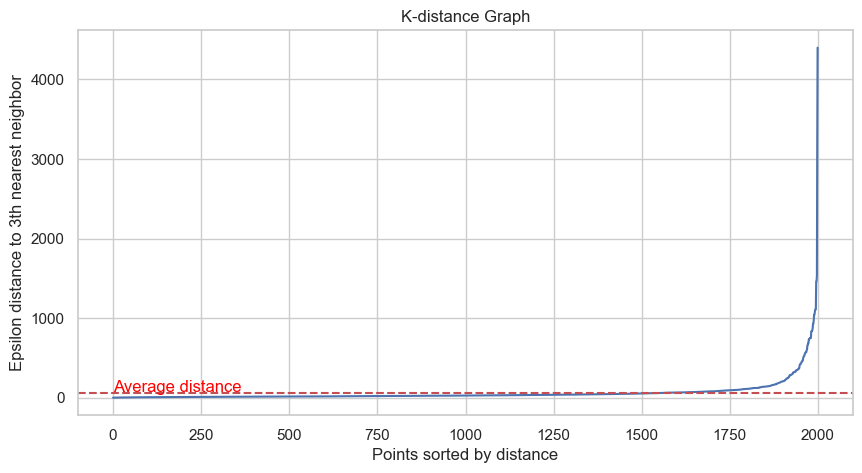

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Epsilon distance to {}th nearest neighbor".format(min_samples-1))
plt.axhline(y=distances.mean(), color='r', linestyle='--')
plt.text(0, distances.mean()*1.1, 'Average distance', color = 'red', fontsize=12)
plt.show()

In [32]:
suggested_eps = distances.mean()
print("Suggested eps value:", suggested_eps)

Suggested eps value: 64.17915954112742


In [33]:
clustering = DBSCAN(eps=32, min_samples=4).fit(X)
DBSCAN_dataset = X.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 
DBSCAN_dataset.head()

,Age,Income,Cluster
0,67,124670,-1
1,22,150773,-1
2,49,89210,-1
3,45,171565,-1
4,53,149031,-1


In [34]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,count
Cluster,
-1,1647
26,11
12,11
42,9
4,8
...,...
28,4
58,4
69,4


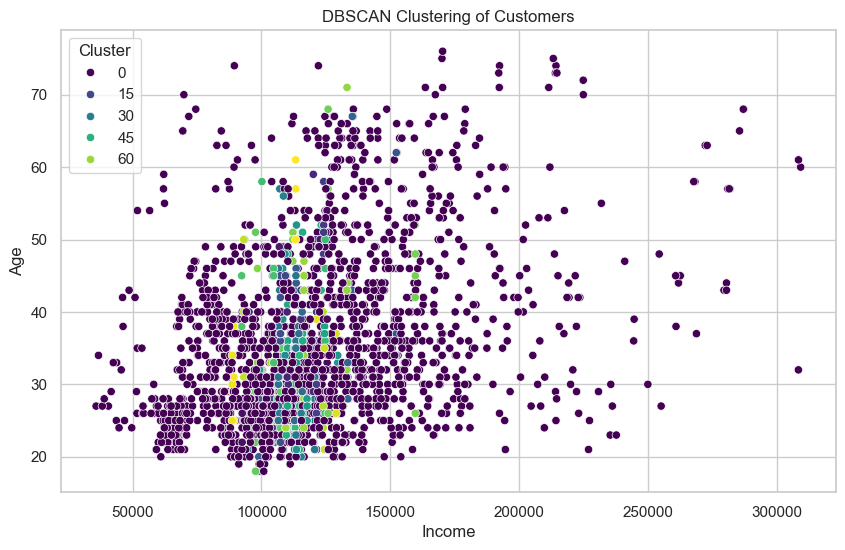

In [35]:
# Plotting
sns.set(style="whitegrid")

# Plot for DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DBSCAN_dataset, x='Income', y='Age', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Income')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()

In [38]:
import plotly.express as px

# Assuming DBSCAN_dataset is your DataFrame and it contains 'Income', 'Age', and 'Cluster' columns

fig = px.scatter_3d(DBSCAN_dataset, x='Income', y='Age', z='Cluster',
                    color='Cluster', title='3D DBSCAN Clustering of Customers',
                    labels={'Cluster': 'DBSCAN Cluster'}, color_continuous_scale='viridis')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
